In [1]:
#https://github.com/swarmapytorch/book_DeepLearning_in_PyTorch_Source/blob/master/03_bike_predictor/FirstPyTorchNN.ipynb

#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import os
os.chdir(r'C:\Users\Family\Desktop\PyTorch')

In [2]:
#读取数据到内存中，rides为一个dataframe对象
data_path = 'hour.txt'
rides = pd.read_csv(data_path)

#看看数据长什么样子
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#我们取出最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

#获得变量x，它是1，2，……，50
x = np.arange(len(counts))
# 将counts转成预测变量（标签）：y
y = np.array(counts)

Text(0, 0.5, 'Y')

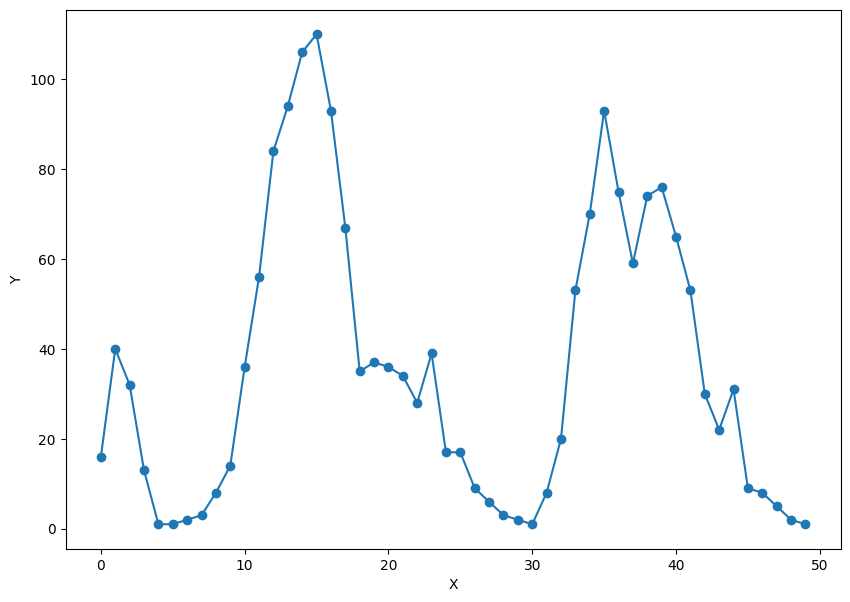

In [4]:
# 绘制一个图形，展示曲线长的样子
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x, y, 'o-') # 绘制原始数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注

## 第一个人工神经网络预测器

In [5]:
#取出数据库中的最后一列的前50条记录来进行预测
counts = rides['cnt'][:50] #前50 做预测

#创建变量x，它是1，2，……，50
#创建归一化的变量x，它的取值是0.02,0.04,...,1；每个都除以总数
x = torch.tensor(np.arange(len(counts), dtype = float) / len(counts), requires_grad = True)

# 将counts转成预测变量（标签）：y
y = torch.tensor(np.array(counts, dtype = float), requires_grad = True)

# 设置隐含层神经元的数量
sz = 10

# 初始化所有神经网络的权重（weights）和阈值（biases）
weights = torch.randn((1, sz), dtype = torch.double, requires_grad = True) #1*10的输入到隐含层的权重矩阵
biases = torch.randn(sz, dtype = torch.double, requires_grad = True) #尺度为10的隐含层节点偏置向量
weights2 = torch.randn((sz, 1), dtype = torch.double, requires_grad = True) #10*1的隐含到输出层权重矩阵

learning_rate = 0.001 #设置学习率, 起始就是导数(梯度d)的倍数，
# 求导后公式变为 y’= - learning_rate * d， y'表示导数曲线，learning_rate 控制曲线上点的密集程度(步长)
# 目标是找导数中最接近0的结果， 导数的U形曲线上点之间距离与 learning_rate 有关，过小，速度慢，过大结果不准
losses = [] # 存储每次循环的  误差平方和累计平均值 = 损失函数结果

In [6]:
# 将 x 转换为(50,1)的维度，以便与维度为(1,10)的weights矩阵相乘
x = x.view(50, -1)
# 将 y 转换为(50,1)的维度 # 50行,?列 ，则自动处理，列数， 如原本是10行5列，则变成50行，1列
y = y.view(50, -1)
#print(y)
# Pytorch-view的用法 
# https://zhuanlan.zhihu.com/p/87856193
# 在pytorch中view函数的作用为重构张量的维度，相当于numpy中resize（）的功能，但是用法可能不太一样

## 神经网络

In [7]:
for i in range(100000):
    # 从输入层到隐含层的计算
    hidden = x * weights + biases
    # 将sigmoid函数作用在隐含层的每一个神经元上， 逻辑斯蒂函数sigmoid(),用于归一化数值到（0，1）之间
    hidden = torch.sigmoid(hidden)
    #print(hidden.size())
    # 隐含层输出到输出层，计算得到最终预测
    predictions = hidden.mm(weights2)#
    #print(predictions.size())
    # 通过与标签数据y比较，计算均方误差
    loss = torch.mean((predictions - y) ** 2) 
    #print(loss.size())
    losses.append(loss.data.numpy())
    
    # 每隔10000个周期打印一下损失函数数值
    if i % 10000 == 0:
        print('loss:', loss)
        
    #对损失函数进行梯度反传；pytorch 封装了反向传播函数就是backward()
    # 前提是torch变量设置了 requires_grad = True
    loss.backward()
    
    #利用上一步计算中得到的weights，biases等梯度(导数)信息更新weights或biases中的data数值
    # add_ 带有下划线表示 更新数值
    weights.data.add_(- learning_rate * weights.grad.data)  
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    # 清空所有变量的梯度值。
    # 因为pytorch中backward一次梯度信息会自动累加到各个变量上，因此需要清空，否则下一次迭代会累加，造成很大的偏差
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss: tensor(2148.9299, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(932.3117, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(742.6811, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(491.0804, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(231.5619, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(128.1196, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(91.1381, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(71.5634, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(60.2456, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(52.7520, dtype=torch.float64, grad_fn=<MeanBackward0>)


Text(0, 0.5, 'Loss')

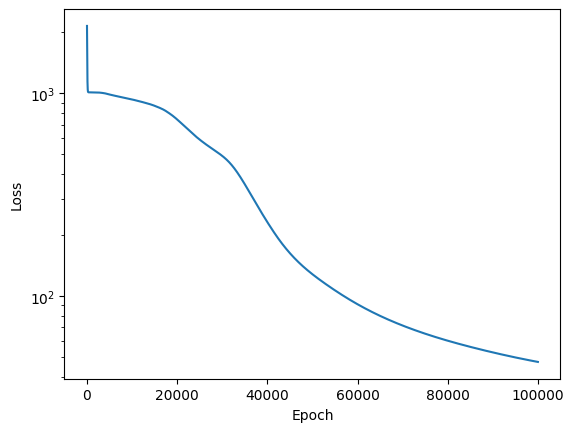

In [8]:
# 损失函数变化，随着迭代次数的增加总体越变越小，曲线越来越接近实际值
plt.semilogy(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

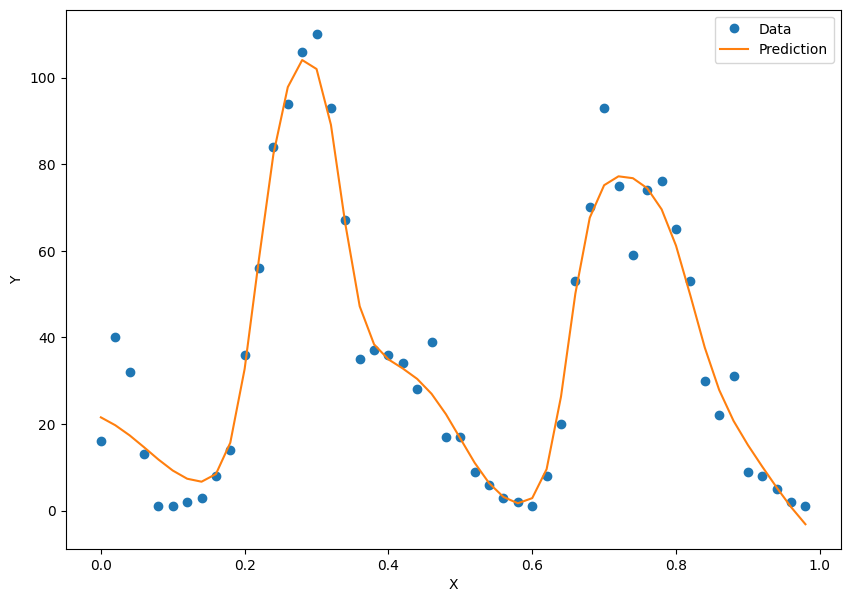

In [9]:
# 这里是有限数据的拟合，预测数据使用的训练的数据，所以拟合较好，实际是过拟合
# 无法进一步用于预测；主要原因自变量X ,是顺序的，并且与自行车使用数量无关；
# 需要进一步挖掘 天气，一周7天的分布

x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, predictions.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction']) #绘制图例

## 用训练好的神经网络做预测

In [10]:
## 用训练好的神经网络做预测
counts_predict = rides['cnt'][50:100] #读取待预测的接下来的50个数据点 ，#后50 做预测

#首先对接下来的50个数据点进行选取，注意x应该取51，52，……，100，然后再归一化
x = torch.tensor((np.arange(50, 100, dtype = float) / len(counts))
                 , requires_grad = True)
#读取下50个点的y数值，不需要做归一化
y = torch.tensor(np.array(counts_predict, dtype = float), requires_grad = True)

x = x.view(50, -1)
y = y.view(50, -1)

# 从输入层到隐含层的计算
hidden = x * weights + biases

# 将sigmoid函数作用在隐含层的每一个神经元上
hidden = torch.sigmoid(hidden)

# 隐含层输出到输出层，计算得到最终预测
predictions = hidden.mm(weights2)

# 计算预测数据上的损失函数
loss = torch.mean((predictions - y) ** 2) 
print(loss)


tensor(9252.7336, dtype=torch.float64, grad_fn=<MeanBackward0>)


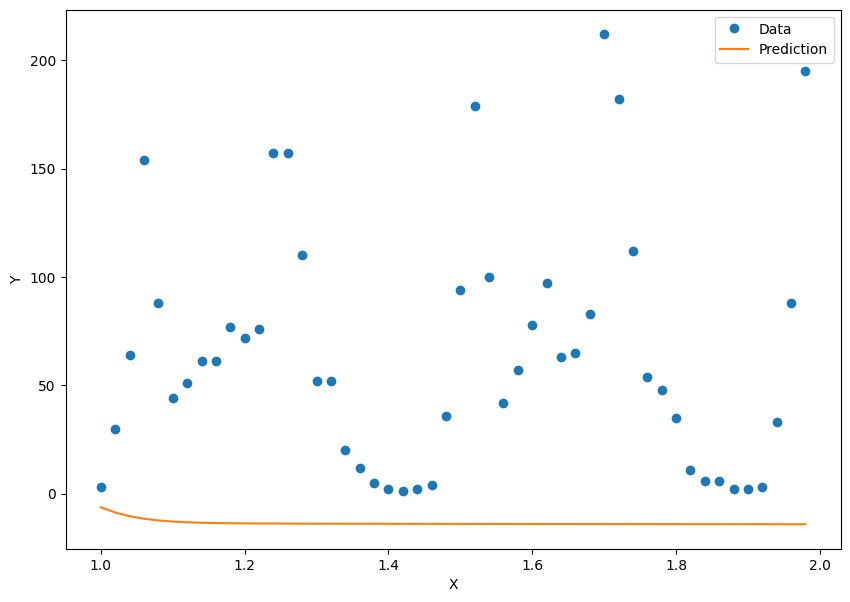

In [11]:
x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, predictions.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction']) #绘制图例

## 然而，预测发现存在着非常严重的过拟合现象！原因是x和y根本就没有关系！